Urban Data Science & Smart Cities <br>
URSP688Y <br>
Instructor: Chester Harvey <br>
Urban Studies & Planning <br>
National Center for Smart Growth <br>
University of Maryland

[<img src="https://colab.research.google.com/assets/colab-badge.svg">](https://colab.research.google.com/github/ncsg/ursp688y_sp2024/blob/main/exercises/exercise07/exercise07.ipynb)

# Exercise 7

## Problem

In week 7, you learned how to extend tabular data with geospatial information: points, linestrings, and polygons.

For this next exercise, please ask a planning-related question with a spatial component, then find data and apply any data science methods you have learned so-far (or can Google!) to answer that question.

## Data

You are welcome to use any data you would like, including data used in previous demos and exercises.

## A Few Pointers
- Choose a straightforward question that requires a reasonable amount of data! Don't shoot for the moon. This exercise is intended to give you a chance to practice finding and analyzing spatial data, not to address the world's greatest challenges.
- Consider using this exercise to get a head start on your final project or explore options for it. Your project doesn't need to focus on spatial analysis for it to play a role. Are there datasets you might join together based on spatial locations?
- Don't go overboard. If you're hitting a wall with coding, write pseudocode and turn that in. Don't let the perfect be the enemy of the done. But if you're energized and having fun by chasing down a thorny solution to a coding problem, by all means feel free to keep at it!



In [ ]:
#Data Sources
# 1. Housing units in Maryland by county: https://data.census.gov/table/ACSDT5Y2022.B25001?t=Housing%20Units&g=040XX00US24$0500000
#   Source: United States Census Bureau 2022 5-year estimate
# 2. Protected Lands in Maryland by County: https://data.imap.maryland.gov/datasets/maryland::maryland-protected-lands-local-protected-lands/about
#   Source: MD iMAP Data Catalog (DOIT) last updated on September 4, 2019
# 3. Maryland County Boundaries: https://data-maryland.opendata.arcgis.com/datasets/maryland-physical-boundaries-county-boundaries-detailed/explore?location=39.014387%2C-77.231774%2C8.88
#   Source: MD iMAP Data Catalog (DOIT) last updated on September 4, 2019

In [ ]:
#Questions
#1. Where is the protected land in Maryland located?
#2. Which area in Maryland has the most protected land?
#3. Which county has the most housing units? Does this overlap with the county with the most protected land?

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Where is the protected land in Maryland located?


(-8873188.441065, -8329736.526235, 4551335.382930003, 4838819.970870003)

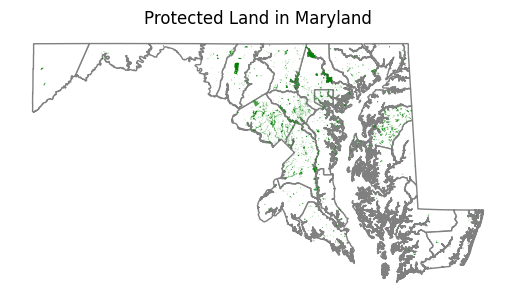

In [148]:
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import pandas as pd

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Set the working directory
os.chdir('/content/drive/MyDrive/exercise07_anderson')

#Read CSV ##
#Read housing units csv
housingunits = pd.read_csv('housingunits.csv')

## Read Shape Files ##
# Read County Boundaries shape file
boundaries = gpd.read_file('BNDY_CountyPhyBoundaryDetailed_SHA.shp')

#Plot file to make sure it has loaded correctly
#boundaries.plot()
#boundaries.head()

# Read Protected Lands shape file
protectedland = gpd.read_file('ENVL_LocalProtectedLands_DNR.shp')

#Plot file to make sure it has loaded correctly
#protectedland.plot()
#protectedland.head()

## Answer Question 1 ##
#Combine county boundries and protected lands files onto one shape file to answer question 1
print("Where is the protected land in Maryland located?")
base = boundaries.plot(color='white', edgecolor='gray')
md = protectedland.plot(ax=base, marker='o', color='green', markersize=5)
md.set_title("Protected Land in Maryland")
md.axis('off')


This area has the highest amount of protected land: Baltimore City with 407 areas.


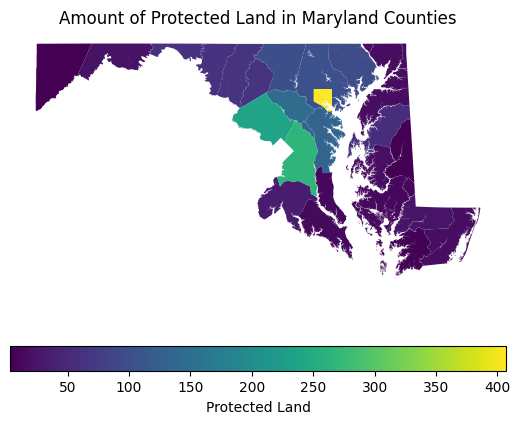

In [151]:
#Create dataframe with county and protected land columns
dataframe = pd.DataFrame()
dataframe['COUNTY'] = pd.Series(protectedland['County'])
dataframe['Land'] = pd.Series(protectedland['Name'])
#dataframe

#Delete duplicate values from dataframe but keep first instance
dataframe = dataframe.drop_duplicates()
#dataframe

# Create column to collect amount of protected lands by filling a list
#iteratively then appending it to existing dataframe
n_county_land = []
for index, row in boundaries.iterrows():
  n_county_land.append(len(dataframe[dataframe['COUNTY'] == row['COUNTY']].index))
boundaries['Protected Land'] = n_county_land
#boundaries

#Find area with highest amount of protected land
max_area = boundaries.loc[boundaries['Protected Land'].idxmax()]['COUNTY']
max_number = boundaries['Protected Land'].max()

## Answer Question 2 ##
#Plot to answer question 2
protected_areas = boundaries.plot(
    column="Protected Land",
    legend=True,
    legend_kwds={"label": "Protected Land", "orientation": "horizontal"},)
protected_areas.set_title("Amount of Protected Land in Maryland Counties")
protected_areas.axis('off')

print(f'This area has the highest amount of protected land: {max_area} with {max_number} areas.')


This area has the highest amount of housing units: Montgomery with 403643 units.


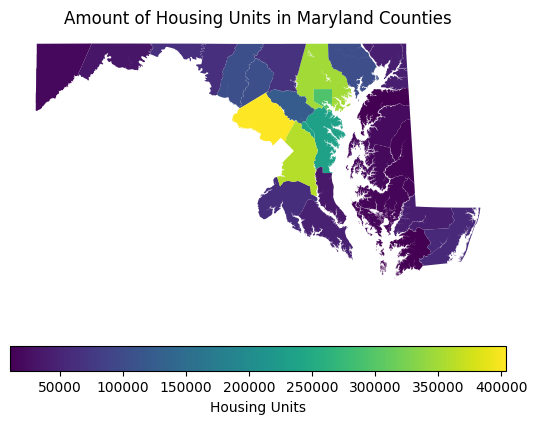

In [153]:
#Question: Which county has the most housing units? Does this overlap with the county with the most protected land?

#Transpose dataframe
units = housingunits.T
#units.set_axis(['County','Housing Units'],axis=1)
units['County'] = units.index
units = units.reset_index()

#Create function to remove 'county' from county names then merge with boundaries
def remove_county(countyname):
  if countyname == 'Baltimore City':
    return countyname
  else:
    return countyname[:-7]
units['County'] = units['County'].apply(remove_county)
county_units = units.merge(boundaries, left_on='County', right_on='COUNTY', how='right')

#Use lamba function to remove comma from housing units values
county_units[0]=county_units[0].apply(lambda s: int(s.replace(',','')))

#Find area with highest amount of housing units
max_unit = county_units.loc[county_units[0].idxmax()]['County']
max_unit_number = county_units[0].max()

#create geodataframe
housing_in_md = gpd.GeoDataFrame(county_units)

## Answer Question 3 ##
#Plot to answer question 3
all_units = housing_in_md.plot(
    column=0,
    legend=True,
    legend_kwds={"label": "Housing Units", "orientation": "horizontal"},)
all_units.set_title("Amount of Housing Units in Maryland Counties")
all_units.axis('off')

print(f'This area has the highest amount of housing units: {max_unit} with {max_unit_number} units.')